In [197]:
import numpy as np
import matplotlib.pyplot as plt

G1 = np.array([22, 20, 23, 23, 17, 24, 23, 18, 22, 19])
G2 = np.array([40, 35, 27, 22, 25, 26, 19, 31, 30, 36])
Data = 25


In [198]:
def hanbetsu_bunseki(G1, G2, Data):
    # 1変数の判別分析. G1,G2:学習データ. Data:判別したい新規データ.
    
    # マハラノビス距離
    D_G1 = np.abs( Data-np.mean(G1) ) / np.std(G1, ddof=1)
    D_G2 = np.abs( Data-np.mean(G2) ) / np.std(G2, ddof=1)
    #Ans = 1 if D_G1 < D_G2 else 2
    if D_G1 < D_G2:
        Ans = 1
    else:
        Ans = 2
        
    return Ans

In [199]:
hanbetsu_bunseki(G1, G2, Data)

2

In [200]:
def hanbetsu_bunseki(G1, G2, Data):
    # 1変数の判別分析. G1,G2:学習データ. Data:判別したい新規データ.
    
    # マハラノビス距離
    D_G1 = np.abs( Data-np.mean(G1) ) / np.std(G1, ddof=1)
    D_G2 = np.abs( Data-np.mean(G2) ) / np.std(G2, ddof=1)
    Ans = 1 if D_G1 < D_G2 else 2

    # 境界線
    A = np.mean(G1)*np.std(G2, ddof=1)
    B = np.mean(G2)*np.std(G1, ddof=1)
    C = np.std(G1, ddof=1)+np.std(G2, ddof=1)    
    Kyokai = (A+B)/C
    print('kyokai : ', Kyokai)#境界の数値を出力する

    if np.mean(G1)>np.mean(G2):
        TrueR1 = len(np.where(G1 >= Kyokai)[0]) / len(G1)
        TrueR2 = len(np.where(G2 < Kyokai)[0]) / len(G2)
    else:
        TrueR2 = len(np.where(G2 >= Kyokai)[0]) / len(G2)
        TrueR1 = len(np.where(G1 < Kyokai)[0]) / len(G1)
        
    return Ans, TrueR1, TrueR2

hanbetsu_bunseki(G1, G2, Data)

kyokai :  23.255529733679843


(2, 0.9, 0.8)

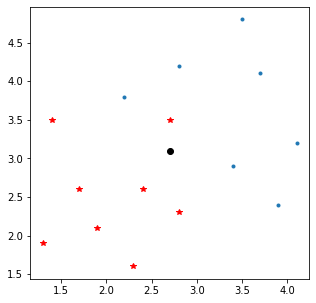

In [201]:

G1 = np.array( [[3.4, 3.9, 2.2, 3.5, 4.1, 3.7, 2.8], [2.9, 2.4, 3.8, 4.8, 3.2, 4.1, 4.2]] )
G2 = np.array( [[1.4, 2.4, 2.8, 1.7, 2.3, 1.9, 2.7, 1.3], [3.5, 2.6, 2.3, 2.6, 1.6, 2.1, 3.5, 1.9]] )
Data = np.array( [2.7, 3.1] )

fig = plt.figure(figsize=(5, 5))
plt.plot(G1[0], G1[1], '.')
plt.plot(G2[0], G2[1], 'r*')
plt.plot(Data[0], Data[1], 'ko')

In [202]:

def hanbetsu_bunseki2(G1, G2, Data):
    # 2変数の判別分析. G1,G2:学習データ. Data:判別したい新規データ.
    
    # マハラノビス距離
    tmp = np.dot( Data-np.mean(G1,axis=1), np.linalg.inv(np.cov(G1)) )
    D_G1 = np.dot(tmp, (Data-np.mean(G1,axis=1)).T)
    tmp = np.dot( Data-np.mean(G2,axis=1), np.linalg.inv(np.cov(G2)) )
    D_G2 = np.dot(tmp, (Data-np.mean(G2,axis=1)).T)
    
    if D_G1 < D_G2:
        Ans = 1
    else:
        Ans = 2
            
    return Ans
    

In [203]:
hanbetsu_bunseki2(G1, G2, Data)

2

In [204]:
def seito_ritu(G1, G2):
    
    # グループ1の正答率
    True1 = 0
    for i in range( len(G1[0]) ):
        Data = G1[:,i]#i列目を抽出する
        Ans = hanbetsu_bunseki2(G1, G2, Data)
        
        if Ans == 1:
            True1 = True1+1
            
    TrueR1 = True1/len(G1[0])
    
    
    # グループ2の正答率
    True2 = 0
    for i in range( len(G2[0]) ):
        Data = G2[:,i]
        Ans = hanbetsu_bunseki2(G1, G2, Data)
        
        if Ans == 2:
            True2 = True2+1
            
    TrueR2 = True2/len(G2[0])    
    
    return TrueR1, TrueR2

In [205]:
seito_ritu(G1, G2)

(1.0, 0.875)

In [206]:
#健常者１,G1[0] = x1, G1[1] = x2のデータ
G1 = np.array([[50, 69, 93, 76, 88], [15.5, 18.4, 26.4, 22.9, 18.6]])

#患者２, G2[0] = x1, G2[1] = x2のデータ
G2 = np.array([[43, 56, 38, 21, 25], [16.9, 21.6, 12.2, 16, 10]])

data = np.array([40, 19])

In [207]:
#２変数の場合
hanbetsu_bunseki2(G1, G2, data)
#結果：患者

2

data :  [40 19]


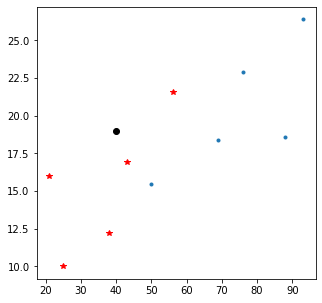

In [208]:
fig = plt.figure(figsize=(5, 5))
plt.plot(G1[0], G1[1], '.')
plt.plot(G2[0], G2[1], 'r*')
plt.plot(data[0], data[1], 'ko')
print('data : ', data)

In [209]:
seito_ritu(G1, G2)

(0.8, 1.0)

In [210]:
#変数x1のみで判別
#G1[0]:健常者で検査値x1
#G2[0]:患者で検査値x1
hanbetsu_bunseki(G1[0], G2[0], data[0])

kyokai :  54.11706468533599


(2, 0.8, 0.8)

In [211]:
#変数x2のみで判別
#G1[0]:健常者で検査値x2
#G2[0]:患者で検査値x2
hanbetsu_bunseki(G1[1], G2[1], data[1])

kyokai :  17.90661320452084


(1, 0.8, 0.8)

In [212]:
#x1 = np.concatenate([G1[0], G2[0]])
#x2 = np.concatenate([G1[1], G2[1]])
g1x1 = G1[0]
g1x2 = G1[1]
x1v = np.mean(g1x1)
x2v = np.mean(g1x2)

COV = np.cov(g1x1, g1x2)
gyaku = np.linalg.inv(COV)

In [213]:
import sympy
#G1健常者グループ行列計算でD^2を求める
#M = [x1-x1.mean, x2-x2.mean]
sympy.var('x, y')#x = x1, y = y2

M = sympy.Matrix([[x-x1v, y-x2v]])
A = sympy.Matrix([[x-x1v], [y-x2v]])
Dg1 = M*gyaku*A
print(Dg1)

Matrix([[(x - 75.2)*(0.00822419883107425*x - 0.0248028551259905*y - 0.113473621731616) + (y - 20.36)*(-0.0248028551259905*x + 0.12922909718234*y - 0.765929713157957)]])


In [214]:
#G2患者グループ行列計算でD^2を求める
x1v = np.mean(G2[0])#平均
x2v = np.mean(G2[1])

COV = np.cov(G2[0], G2[1])
gyaku = np.linalg.inv(COV)#逆行列

M = sympy.Matrix([[x-x1v, y-x2v]])
A = sympy.Matrix([[x-x1v], [y-x2v]])
Dg2 = M*gyaku*A
print(Dg2)

Matrix([[(x - 36.6)*(0.00999346210493384*x - 0.0222005148312808*y - 0.0252048155287308) + (y - 15.34)*(-0.0222005148312808*x + 0.0990499799837534*y - 0.7068878501259)]])


In [215]:
siki = Dg1-Dg2
siki = sympy.expand(siki)
siki

Matrix([[-0.00176926327385959*x**2 - 0.00520468058941946*x*y - 0.176537612405771*x + 0.0301791171985868*y**2 - 0.118083726064115*y + 12.3613894448307]])

In [216]:
print(*siki)



-0.00176926327385959*x**2 - 0.00520468058941946*x*y - 0.176537612405771*x + 0.0301791171985868*y**2 - 0.118083726064115*y + 12.3613894448307


In [233]:
from sympy import solve

solve(siki, y)


[0.0862298349413478*x - 20.143816305185*sqrt(0.00016280271226716*x**2 + 0.015247571975824*x - 1) + 1.95638138264768,
 0.0862298349413478*x + 20.143816305185*sqrt(0.00016280271226716*x**2 + 0.015247571975824*x - 1) + 1.95638138264768]

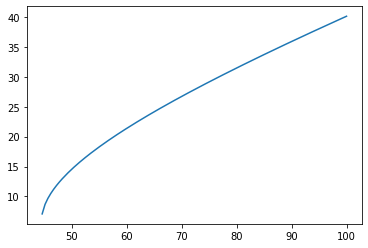

In [236]:
import matplotlib.pyplot as pyplot

x = np.linspace(-4, 100, 200)
q = 0.0862298349413478*x + 20.143816305185*(0.00016280271226716*x**2 + 0.015247571975824*x - 1)**0.5 + 1.95638138264768

plt.plot(x, q)



data :  [40 19]


Text(0, 0.5, 'x2')

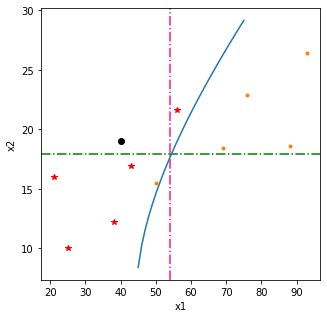

In [241]:
fig = plt.figure(figsize=(5, 5))

ax = fig.add_subplot(111)#境界線の描写
ax.axvline(54.11706468533599, ls = "-.", color = "deeppink")
ax.axhline(17.906613, ls = "-.", color = "green")

x = np.linspace(-4, 75, 80)
q = 0.0862298349413478*x + 20.143816305185*(0.00016280271226716*x**2 + 0.015247571975824*x - 1)**0.5 + 1.95638138264768

plt.plot(x, q)


plt.plot(G1[0], G1[1], '.')
plt.plot(G2[0], G2[1], 'r*')
plt.plot(data[0], data[1], 'ko')
print('data : ', data)
plt.xlabel("x1")
plt.ylabel("x2")